# 如何规划和控制一个流浪的地球

# 1. 前言

1. 看了流浪地球。很不错啊。写个硬核科普文支持一下。

2. 本文自成一体。如何你学过线性代数和多元微积分，应该可以看懂。

3. To educate. Not to impress. 不装B,不炫技。

4. 数学不追求完备。但是会很solid（稳？）。

5. 工程导向。目的是做一个效果不错，结构清晰的系统。

6. 程序由Python编写。实现简单直接。但是会遵守基本编程原则。

7. 为了整篇文章的幽默。所以的内容我会认真写，不搞笑。

### 想要解决的具体问题

在流浪地球里共有五个时代。

* 1. 刹车时代
  用地球发动机使地球停止转动，使发动机喷口固定在地球运行的方向

* 2. 逃逸时代
  全功率开动地球发动机，使地球加速到逃逸速度，飞出太阳系

* 3. 流浪时代Ⅰ
  在外太空继续加速，飞向比邻星

* 4. 流浪时代Ⅱ
  在中途使地球重新自转，掉转发动机方向，开始减速
  
* 5. 新太阳时代
  地球泊入比邻星轨道，成为这颗恒星的卫星。

其中1.是一个比较简单的控制问题。这里就不讲了。

对于2. 3. 4. 5. 我们将用计算机程序和数学解决。

### 结果

为了提起大家的兴趣，我先把规划的结果放出来。

* 逃逸时代
  全功率开动地球发动机，使地球加速到逃逸速度，飞出太阳系
  
* 流浪时代Ⅰ + 流浪时代Ⅱ
  在外太空继续加速，飞向比邻星。掉转发动机方向，开始减速
  
* 新太阳时代
  地球泊入比邻星轨道，成为这颗恒星的卫星

怎么做的？

通过Least squares。

# 2. Least Sqaures (回归问题) 回顾 

Least Squares 是优化问题的一种特殊的子类。

由于Least Squares的定义，我们可以通过Jacobian（一阶导数矩阵）直接得到Hessian（二阶导数矩阵）。于是我们可以很容易的通过Newton method来解Least squares优化问题。

因为Newton Method比Gradient descent快一个量级（Newton method基本上是理论上最快的优化方法）,再加上如果Hessian是稀疏的。这个优化问题就可以超级超级超级快的解出来。

请大家认真阅读这一部分。之后都要用到。自己推的，细节都还健在。

## 2.1 Least Sqaures (回归问题) 回顾 

### 2.1.2 Linear Least Squares 线性回归

#### 定义

* **给定**: 一个residual function （参差函数）,

$$ r = A x + b,  x \in R^{n \times 1}, r \in R^{m \times 1} A \in R^{m \times n}$$

* **定义优化问题**: cost function,
$$ \textrm{cost}(x) = r^T r $$

 想找到让cost function 取最小值时的x，
  $x^* = \textrm{argmin}( cost )$

#### 怎么解？

$x^*$满足，

$$A^TAx^* = -A^Tb$$

通过解这个线性系统，我们可以**一步**解出$x^*$。

这个线性系统叫做Normal Equations。

#### 证明

为了解 

$$\textrm{argmin}(\textrm{cost}(x)) = r(x)^Tr(x)$$

带入 $r = Ax + b$,

$$ \textrm{cost}(x) = (A x + b)^T (A x + b) $$

$$ \textrm{cost}(x) = x^TA^TAx + 2x^TA^Tb + b^Tb$$

因为它是Quadratic Form(多元二次函数)，求$\textrm{cost}$的最小值只要求它的导数，然后求导数为0时对应的$x$。

$$ \frac{\partial cost}{\partial x} = A^TAx + A^Tb $$

$x^*$满足，

$$ A^TAx^* + A^Tb = 0 $$

$$ A^TAx^* = -A^Tb $$

解这个线性方程组可以得到 $x_*$。

#### 总结一下

从以上的推倒，希望你可以看出

$\textrm{cost}(x)$ 的 Hessian 是 $A^TA$. 原因是我们对$\textrm{cost}(x)$ 的定义。

### 2.2.2 Nonlinear Least Squares 非线性回归

#### 定义

* **给定**: A residual function,

$$ r(x),  x \in R^{n \times 1}, r: R^{n \times 1} \mapsto R^{m \times 1}$$

* **定义优化问题**: The cost function,
$$ \min_x cost(x) = r^T r $$

想找到让cost function 取最小值时的x，
  $x^* = \textrm{argmin}( cost )$
  
#### 怎么解？

很明显，cost(x)不是一个二次函数。所以它没有解析解。

#### 解的推倒

我们先对r(x)函数做在$x_0$的线性近似。让这个近似函数为$l(x)$,

$$ l(x) = J(x_0)(x - x_0) + r(x_0)$$

其中， $J(x_0)$ 是 $r$ 在 $x_0$ 的Jocabian. 它是个 $m \times n$ 矩阵. （确保你看得懂这句话）

为了看的清楚， 忽略$J$ 和 $r$ 的 $x_0$，

$$ l(x) = J(x - x_0) + r$$

把 $l(x)$ 代入 cost function,

$$ \textrm{cost}(x) \approx \textrm{cost_approx} = (J(x - x_0) + r_0)^T (J(x - x_0) + r_0)$$

Change of variables, 让 $\Delta x = x - x_0$,

$$ \textrm{cost_approx}(\Delta x) \approx (J \Delta x + r_0)^T (J \Delta x + r_0) $$

回顾Least Squares的推倒。这就是Linear least squares 问题！！

于是, 以上cost_approx的argmin, $\Delta x^*$ 可以通过解以下线性方程组得到，

$$ J^TJ\Delta x^* = J^Tr_0 $$

因为我们做了changed the varibles,所以真正的解是, 

$$x = x_0 + \Delta x^* $$

因为cost_approx是一个cost的近似. 在这一步中我们一般会做 $x = x_0 + \lambda \Delta x^* $, 其中 $\lambda \in (0, 1]$ . 

又因为最开始对r(x)的线性近似，我们将重复这个迭代过程。

#### 具体的解法

1. 猜个初始值$x_0$
2. 算 $J(x)$， $r(x)$
3. 解线性近似的the normal euqation $J(x)^TJ(x)\Delta x = J(x)^Tr(x)$ 得到 $\Delta x$
4. $ x_0 = x_0 + \lambda \Delta x$
5. 回到2，重复这个过程。


### 2.2.3 Nonlinear Least Squares with Regularization 加上正则的非线性回归

#### 定义

* **给定**: A residual function,

$$ r(x),  x \in R^{n \times 1}, r: R^{n \times 1} \mapsto R^{m \times 1}$$

* **定义优化问题**: The cost function，
$$ \min_x cost(x) = r(x)^T r(x) + h(x)$$

#### 怎么解

我们先对r(x)函数做在$x_0$做一次近似,

$$ r(x) \approx J(x - x_0) + r_0$$

对h(x)函数做在$x_0$做二次近似,

$$ ｈ(x) \approx (x-x_0)^T H_h (x-x_0)+J_h(x - x_0) + h_0$$

把近似值代入 cost function,

$$ \textrm{cost}(x) \approx \textrm{cost_approx} = (J(x - x_0) + r_0)^T (J(x - x_0) + r_0)　+　(x-x_0)^T H_h (x-x_0)+J_h(x - x_0) + h_0$$

让 $\Delta x = x - x_0$,

$$ \textrm{cost_approx}(\Delta x) = (J \Delta x + r_0)^T (J \Delta x + r_0) + \Delta x^T H_h \Delta x+J_h\Delta x + h_0 $$

求导让导数为0得到，

$$(J^TJ + H_h)\Delta x = - (J^Tr + J_h) $$

也就是说对于Nonlinear Least Squares with Regularization，我们要解以上方程得到$\Delta x$。


### 2.2.４ Weighted Least Squares 加权

* **给定**: 一个residual function （参差函数）,

$$ r = A x + b,  x \in R^{n \times 1}, r \in R^{m \times 1} A \in R^{m \times n}$$

* **定义优化问题**: cost function,
$$ \textrm{cost}(x) = r^TWr $$

其中W是一个加权矩阵。

#### 怎么解？

$x^*$满足，

$$A^TWAx^* = -A^TWb$$

通过解这个线性系统，我们可以**一步**解出$x^*$。

我就不推了。

对于Weighted non-linear least squares, 我们需要解以上方程来得到$\Delta x$。


## 3. 流浪地球的规划与控制

### 3.1 怎样用Least Square解决规划和控制

根据以上的讨论。我们知道，要用least square解决一个优化问题。我们只需要定义residual function,r(x)。

定义x是球的轨迹。是所有状态的集合。

$$ x = \textrm{trajectory} = \{ \textrm{s_i} \} $$

对于r(x), 分为３部分，

1. 轨迹要符合运动模型。
　　$$r_{motion}(s_i, s_{i+1}) = m(s_i) - s_{i+1}$$
   直观上讲，我们想让相邻的两个state尽量符合运动方程。

2. 轨迹的第一个状态和初始值近
   $$r_{prior}(s_0) = s_0 - \textrm{prior_state}$$

3. 轨迹的最后一个状态和想到的状态近
   $$r_{target}(s_n) = s_n - \textrm{target_state}$$

给出resiual function, 和他们的权重。我们就可以利用least square框架拉求解这个优化问题了。

为了大家理解方便，这个问题的least squares cost function为，

$$ cost({s_i}) = \sum_{i=0}^{n-1} \| m(s_i) - x_{i+1} \|_{W_m}^2  +  \| s_0 - \textrm{prior_state} \|_{W_p}^2 + \| s_n - \textrm{target_state} \|_{W_t}^2 $$

#### 具体的least square求解过程

先定义least square的变量x,

   $$x = {s_0, s_1, ..., s_n}$$
   
让 N = n X len(x)

x是一个N维度的向量。这个优化问题是一个N维度的优化问题。

1. 猜个初始值$x_0$
   
   猜初始值其实对于算trajectory问题非常重要。简单的初始化方法可以从prior_state到target_state插值。

2. 算 $J(x)$， $r(x)$
   
   应为总共有n个states。所以我们有n-1个motion residual。prior residual 1 个。target residual 1 个。
   
   把他们组成r(x)就是，
   
   $$r(x) = r(s0, s1, ... s_n) = \begin{bmatrix}
    r_{motion}(s_1, s_2)   \\  
    r_{motion}(s_2, s_3)   \\  
    ...   \\  
    r_{motion}(s_{n-1}, s_n)  \\  
    r_{prior}(s_0) \\
    r_{target}(s_n) \\ 
    \end{bmatrix}  = 
    \begin{bmatrix}
    m(s_1) - s_{2}   \\  
    m(s_2) - s_{3}   \\  
    ...   \\  
    m(s_{n-1}) - s_{n}  \\  
    s_0 - \textrm{prior_state} \\
    s_n - \textrm{target_state} \\ 
    \end{bmatrix}
    $$
   
   定义$M(s) = \frac{\partial m}{\partial x} (s)$, $I$是长度与state相同的Identity矩阵。
   
   于是r(x)的jocabian J(x)为，其中每个变量都是矩阵。加粗的0表白一个比较大的0矩阵。
   
   $$ J(x) = \begin{bmatrix}
    M(s_0)& -I  &  0        & 0   & \textbf{0}   & 0          & 0  \\
    0   & 0     &  M_(s_1)  & -I  & \textbf{0}  & 0          & 0  \\
    \textbf{0}   & \textbf{0}     &  \textbf{0}        & \textbf{0}   & ...          & \textbf{0}          & \textbf{0}    \\
    0   & 0     &  0        & 0   & \textbf{0}   & M(s_{n-1}) & -I \\
    I   & 0     &  0        & 0   & \textbf{0}   & 0          & 0 \\
    0   & 0     &  0        & 0   & \textbf{0}   & 0          & I \\
    \end{bmatrix} $$
   
   
3. 解线性近似的the normal euqation $J(x)^TJ(x)\Delta x = -J(x)^Tr(x)$ 得到 $\Delta x$
   
   如果有Regulization $h(x)$的话，求解$\Delta x$需要解以下方程
   
   $$(J^TJ + H_h)\Delta x = - (J^Tr + J_h) $$
   
   其中$H_h$ 是$h(x)$的二阶导。$J_h$是$h(x)$的一阶导。
   
4. $ x = x + \lambda \Delta x$
5. 回到2，重复这个过程。


好的！问题的框架已经有了。

之后的问题就是怎样定义state和它的运动模型m(s)了。

我将先解决

* 流浪时代Ⅰ + 流浪时代Ⅱ（在外太空继续加速，飞向比邻星。掉转发动机方向，开始减速）

再解决

* 逃逸时代

* 新太阳时代


## 3.2 地球状态和运动模型

### 地球的State（状态）

State的定义：

$$ s = \begin{bmatrix} 
    x \\ 
    y \\ 
    vx \\ 
    vy \\ 
    \theta \\
    \dot{\theta} \\ 
    thurst \\  
    \end{bmatrix} $$
    
其中，$\dot{\theta}$ 和thrust（推力）为控制变量。（可以拆出来。为了方便，我就放一起了；理论上朝向的二阶导应该是控制变量）。

### 地球的运动模型

运动模型为，

$$ s_{next} = m(s) =  \begin{bmatrix}
    x + dt vx   \\
    y + dt vy   \\  
    vx + dt \cos(\theta) thurst   \\  
    vx + dt \sin(\theta) thurst  \\  
    \theta + dt \dot{\theta}  \\
    \dot \theta   \\ 
    thurst \\  
    \end{bmatrix} $$

在这个模型中，推力方向是由地球的朝向决定的。所以，优化问题需要找出一组最优的喷气方向和对应的喷气大小。这也是这个模型有意思的地方。

(这里还假设了地球可以单独产生扭矩。不知道电影里的地球可以不可。。。)

运动模型的Jocabian很容易，我就给出了。请看代码。

### 时间dt

关于dt,有个问题。希望你已经发现了。

因为我们将trajectory分成n个states表示。隐含假设了最后一个state的时间是n * dt.

也不是不行。可以猜很多时间。算多条轨迹。最好的选一条。

有点挫。

不能自己降维打击自己的优化问题啊。

还是把时间一起规划吧。

简单的说就是多加一个dt作为least squares的变量。

Residual的Jocabian就会多一行。填上对应的导数就好了。

于是我们可以回答一下的问题：

1. 我想用2500年到比邻星，要多大的发动机？

2. 我有聚变发动机，我想尽快到比邻星，要几代人的时间？

### Regularization 正则

因为trajectory不是唯一的，我们必须通过正则来“约束”解的数量。

我正则了推力,转向速度和时间,

$$ cost(x) = r^TWr + w_{th} \sum {thurst_i}^2 + w_{tt} \sum {\dot \theta}^2 + w_{time}dt^2 $$

也就是说找到能量比较小时间不要花太久的解。

### 3.2.2 流浪时代Ⅰ + 流浪时代Ⅱ 模拟1

然而这个模型有个问题。

推力方向可以是负数。最后的优化解果是bang-bang control。也就是前半段最大加速，后半段最大减速。


然而人类脑子抽了，只在地球的一边装了发动机。

也就是说推力得大于0。

怎？么？办？

init_state: [0.   0.   0.   0.   0.01]
target_state: [100.   0.   1.   0.   0.]
Iteration:  0
Iteration:  20
Iteration:  40
Iteration:  60
Iteration:  80


<IPython.core.display.Javascript object>


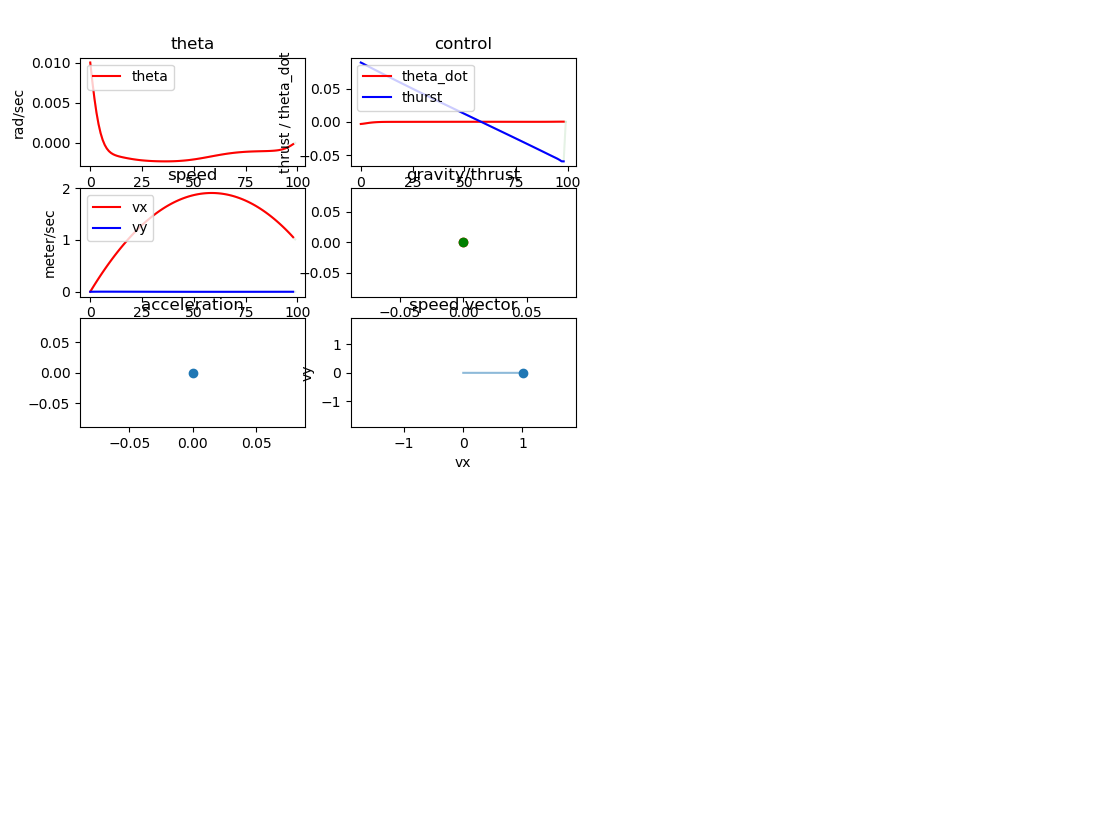

<IPython.core.display.Javascript object>


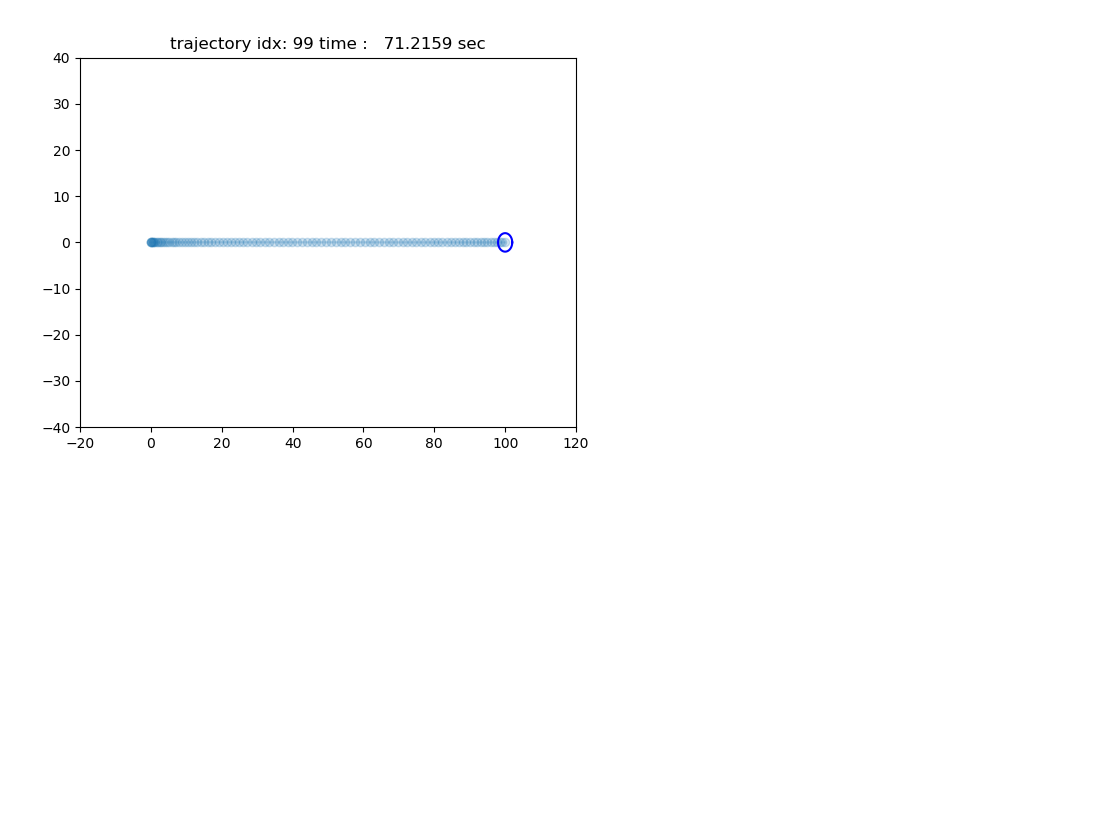

In [1]:
# 最好直接用命令行跑。Python notebook plot的有点挫
%matplotlib notebook

import scenarios
import parameters as p

p.plot_python_notebook = True
p.enable_thrust_constrain = False

scenarios.wandering_earth_era_3_4_planning()


## 3.3 推力的不等约束

### 不等约束约束下的优化问题

定义：

$$ \textrm{minimize  } cost(s_0, s_1, ... s_n) $$

$$ \textrm{subject to: } thurst_i > 0  \quad  \forall i  $$

其中　thurst_i 代表state_i的thurst。

不等约束是优化问题的比较难处理的一种约束。一种比较简单（但是效果捉急）的方法是log barrier。

用log barrier来处理以上问题的不等约束。新的问题为，

$$ \textrm{minimize  } cost(s_0, s_1, ... s_n) - t \sum_{i=0}^n \log(thurst_i) $$

简单的理解是我们的不等约束当成了Regularization。当thrust靠近0的时候，-log(thurst)会很大。于是优化不会向这个方向走。

t是一个log barrier问题的参数。t越小，log barrier和原始问题越接近。但是数值上也越不好处理。


### 怎么解？

通过log barrier，我们可以把一个约束下的least square用一个Regulized least square来近似。

回顾前一节，解least squares的第三部是，

3. 解线性近似的the normal euqation $J(x)^TJ(x)\Delta x = -J(x)^Tr(x)$ 得到 $\Delta x$
   
   如果有Regulization $h(x)$的话，求解$\Delta x$需要解以下方程
   
   $$(J^TJ + H_h)\Delta x = - (J^Tr + J_h) $$
   
   其中$H_h$ 是$h(x)$的二阶导。$J_h$是$h(x)$的一阶导。

于是我们只需要求log barrier函数的一二阶导数。

在优化的过程中，我们会渐渐减小log barrier的t。这种方法叫做central path（光明大道法）。


### 流浪时代Ⅰ + 流浪时代Ⅱ 模拟2

流浪时代Ⅰ + 流浪时代Ⅱ：在外太空继续加速，飞向比邻星。掉转发动机方向，开始减速。

init_state: [0.   0.   0.   0.   0.01]
target_state: [100.   0.   1.   0.   0.]
Iteration:  0
Iteration:  20
Iteration:  40
Iteration:  60
Iteration:  80


<IPython.core.display.Javascript object>


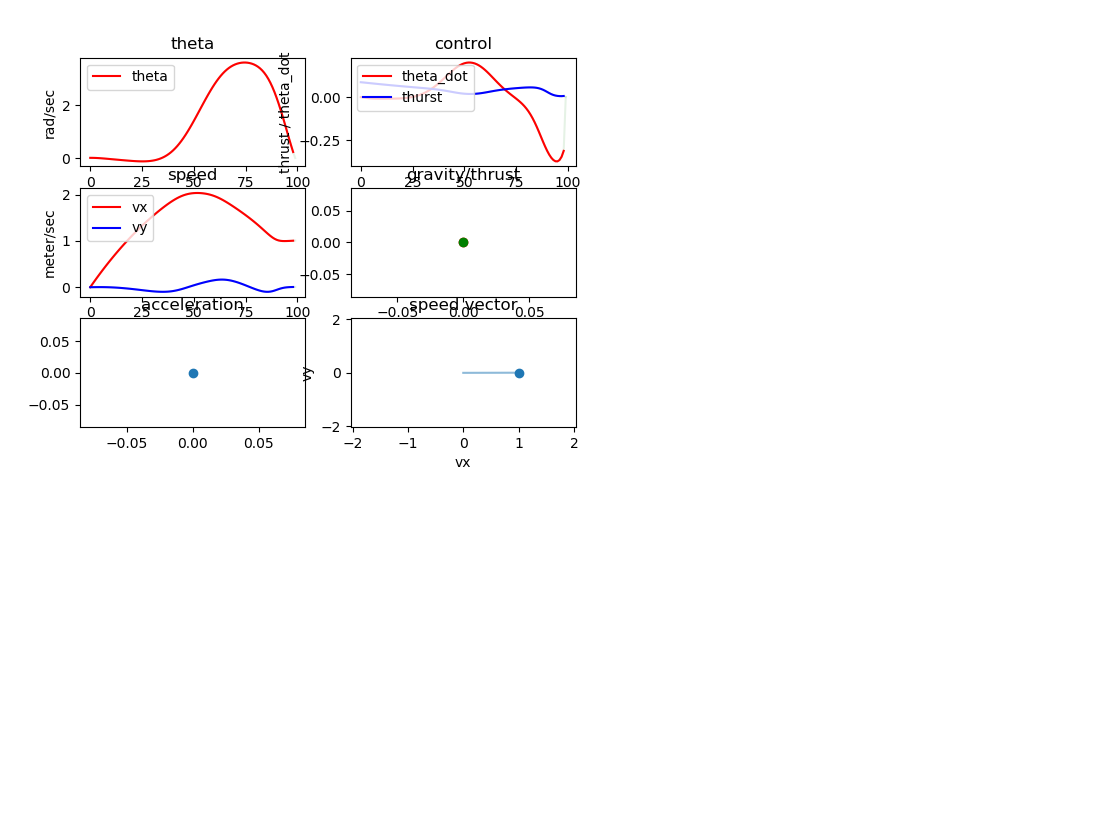

<IPython.core.display.Javascript object>


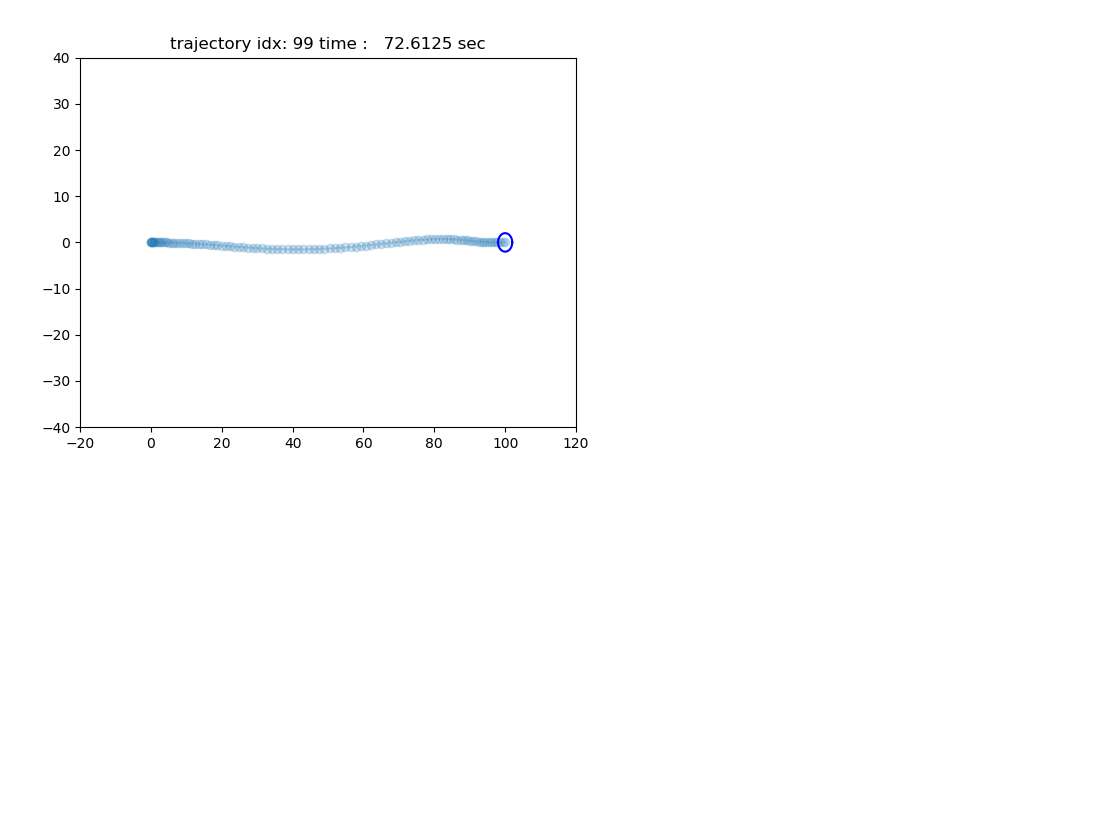

In [2]:
# 最好直接用命令行跑。Python notebook plot的有点挫
%matplotlib notebook

import scenarios
import parameters as p

p.plot_python_notebook = True
p.enable_thrust_constrain = True

scenarios.wandering_earth_era_3_4_planning()

## 3.4 引力

引力场的定义：

给定一个质量为m，位置在p1=(x_q,y_q)的星星

在（x,y）位置，它产生的引力场为，

假设 r = (x_q - x, y_q - y)
 $$ (g_x, g_y) = g = (\frac{G m}{r^Tr}(x_q - x), \frac{G m}{r^Tr}(y_q - y)) = \frac{G m}{r^Tr} r
 $$
 
引力对地球的影响可以在地球的运动模型里直接体现。

### 引力下的运动模型

因为引力场影响速度，只要修改速度的运动方程，

定义引力场下的运动模型m2(s)，

$$ s_{next} = m2(s) =  \begin{bmatrix}
    x + dt vx   \\
    y + dt vy   \\  
    vx + dt \cos(\theta) thurst + dt g_x \\  
    vx + dt \sin(\theta) thurst + dt g_y \\  
    \theta + dt \dot{\theta}  \\
    \dot \theta   \\ 
    thurst \\  
    \end{bmatrix} $$
    
### 泊入天体的轨道

泊入天体的轨道大概是指飞船不喷气的情况下，引力完全作为向心力让飞船围着天体圆形转圈。转圈的方向和初始速度有关。

举个例子。

给定一个质量为m，位置在p_star=(x_q,y_q)的星星。

一个飞船想飞到p=（x,y），关发动机，然后绕着这个星星转。

不过因为在轨“稳态”的速度不为0。所以我们得算出这个速度才能知道我想达到的状态。

### 在轨速度

假设g(x,y)是星星在（x,y）的引力场。r = p_star - p

先算稳态时的角速度，

$$ w = \sqrt{ \frac{\sqrt{g^Tg}}{\sqrt{r^Tr}}} $$

应为2D的角速度是沿着z轴的，w在（x,y,0）产生的速度就是，

$$ vx,vy,0 =  (0, 0, w) \times (x,y,0) $$

其中（vx,vy）是“稳态”时的速度。X是所谓叉乘。

### 逃逸时代 模拟

全功率开动地球发动机，使地球加速到逃逸速度，飞出太阳系

init_state: [ 0.          5.         -2.23606798 -0.          0.        ]
target_state: [100.   0.   1.   0.   0.]
Iteration:  0
Iteration:  20
Iteration:  40
Iteration:  60
Iteration:  80


<IPython.core.display.Javascript object>


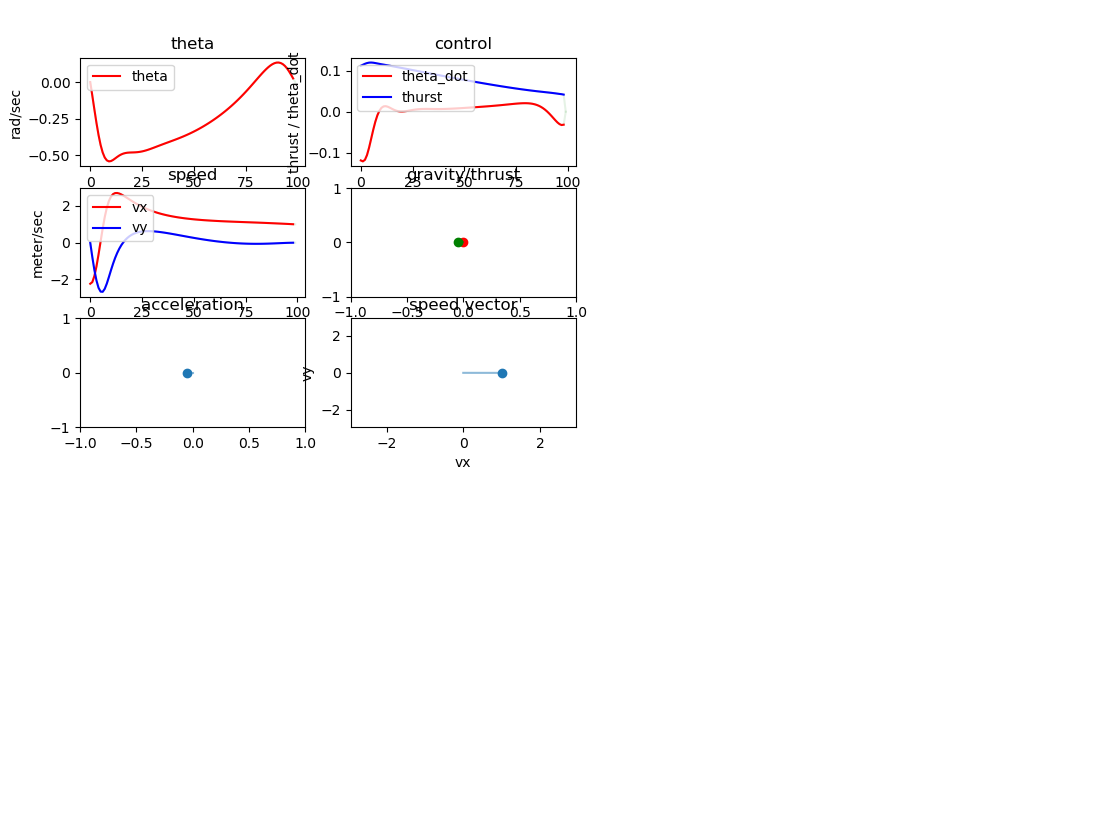

<IPython.core.display.Javascript object>


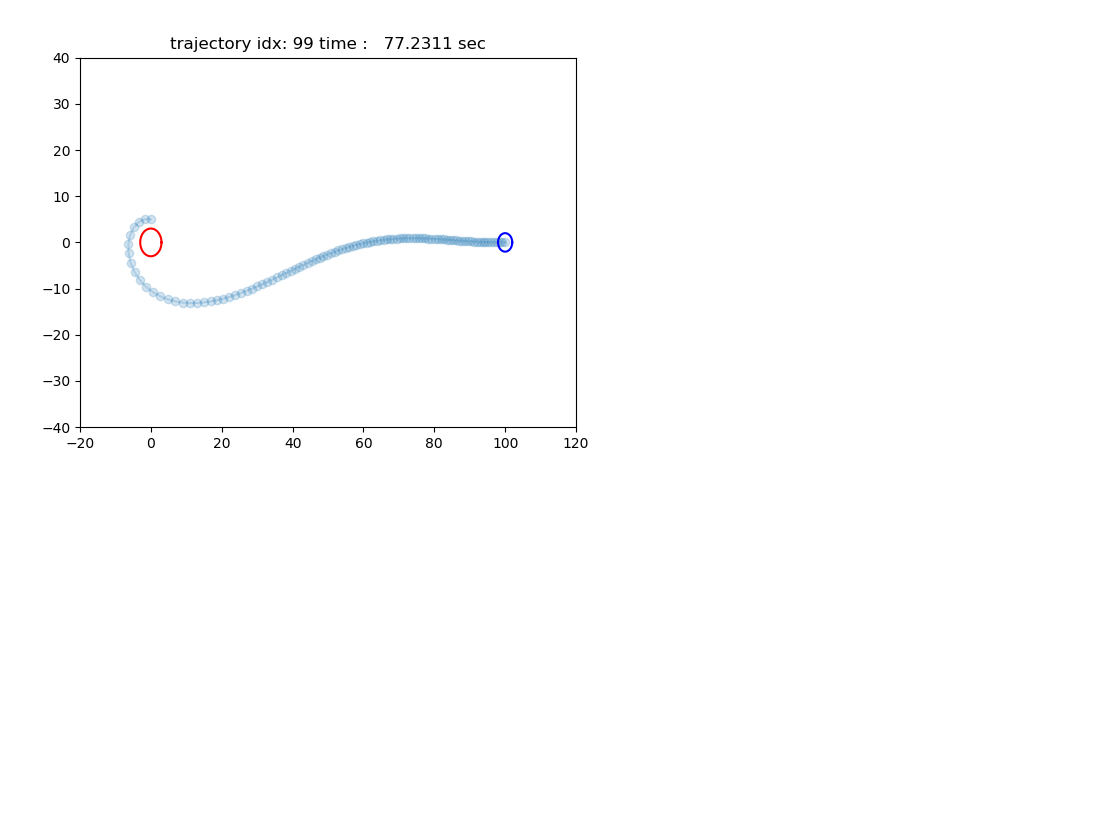

In [3]:
# 最好直接用命令行跑。Python notebook plot的有点挫
%matplotlib notebook

import scenarios
import parameters as p

p.plot_python_notebook = True
p.enable_thrust_constrain = True

scenarios.wandering_earth_era2_planning()

### 新太阳时代 模拟

地球泊入比邻星轨道，成为这颗恒星的卫星

init_state: [100.           0.          -1.           0.           3.14159265]
target_state: [ 0.         10.         -2.23606798 -0.          0.        ]
Iteration:  0
Iteration:  20
Iteration:  40
Iteration:  60
Iteration:  80


<IPython.core.display.Javascript object>


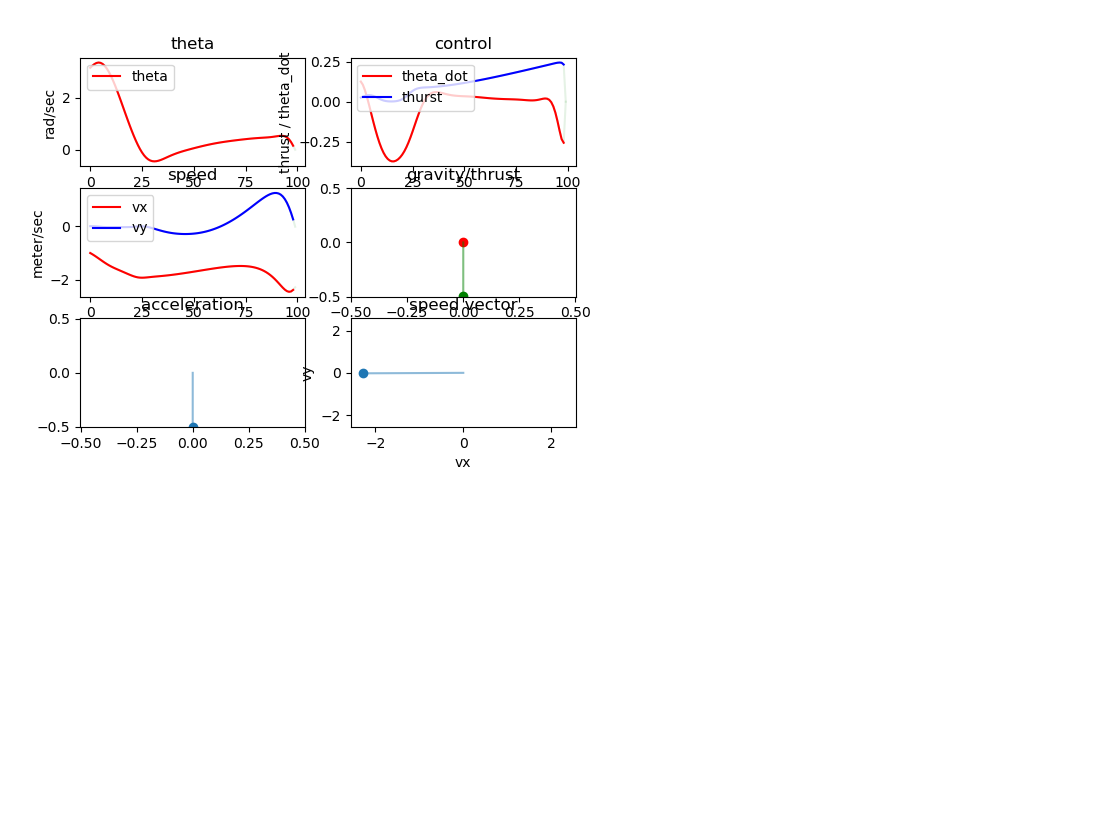

<IPython.core.display.Javascript object>


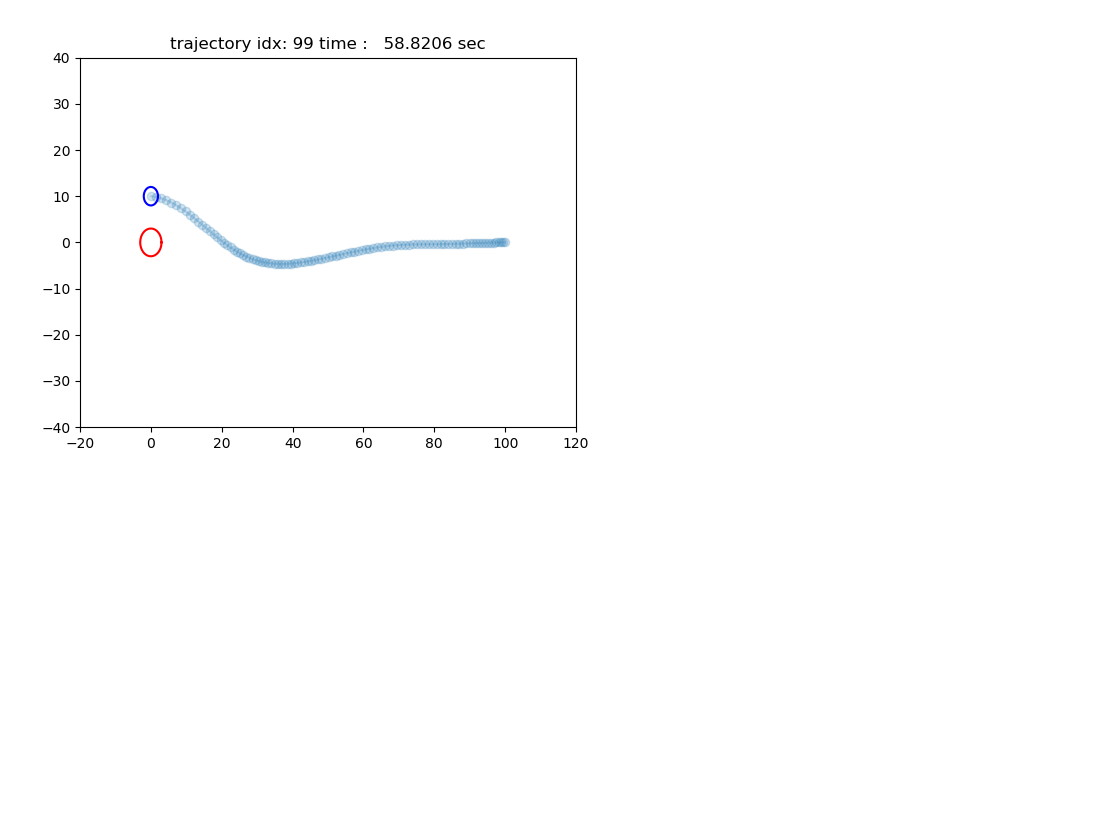

In [4]:
# 最好直接用命令行跑。Python notebook plot的有点挫
%matplotlib notebook

import scenarios
import parameters as p

p.plot_python_notebook = True
p.enable_thrust_constrain = True

scenarios.wandering_earth_era_5_planning()

### 挣脱星球引力 模拟


init_state: [0. 0. 0. 0. 0.]
target_state: [100.   0.   1.   0.   0.]
Iteration:  0
Iteration:  20
Iteration:  40
Iteration:  60
Iteration:  80


<IPython.core.display.Javascript object>


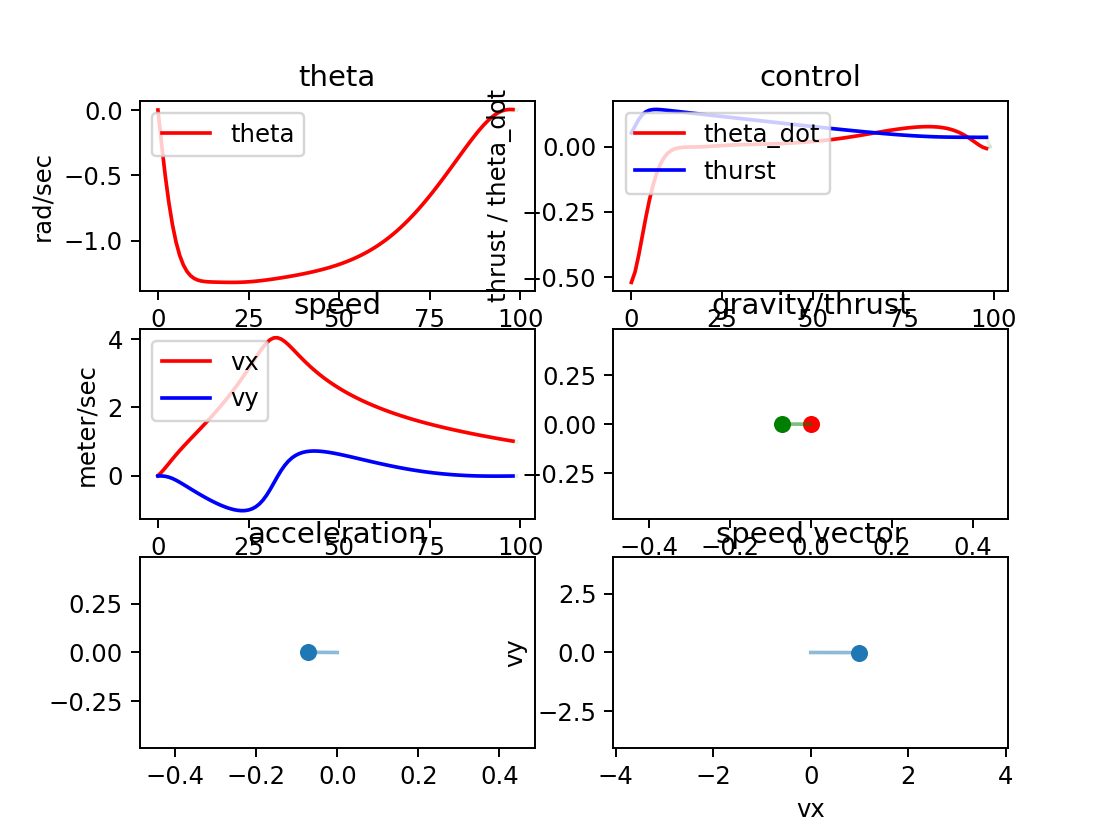

<IPython.core.display.Javascript object>


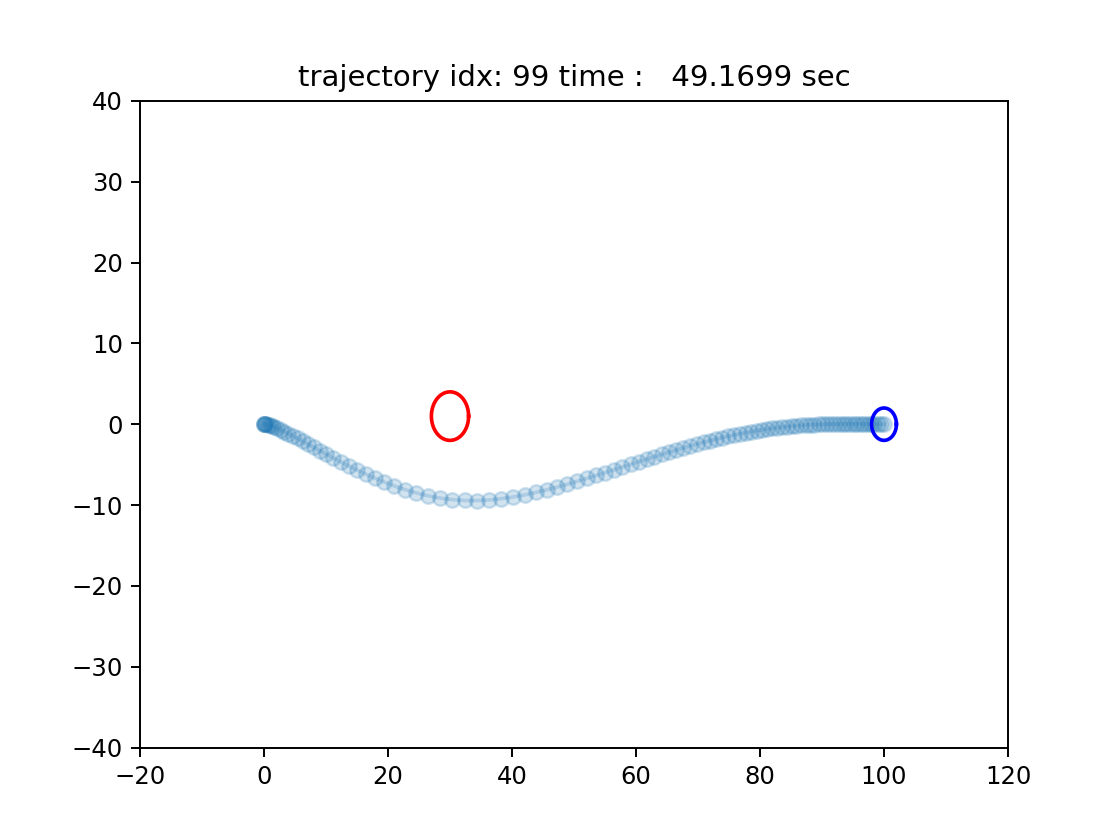

In [5]:
# 最好直接用命令行跑。Python notebook plot的有点挫
%matplotlib notebook

import scenarios
import parameters as p

p.plot_python_notebook = True
p.enable_thrust_constrain = True

scenarios.wandering_earth_era2_jupyter_planning()

## 4 讨论

### 4.1 轨迹的评价

规划问题的评价是个玄学问题。一般用自己的cost function来评价自己。归根结底是规划不存在ground truth。

不过通过看residual我们可以看出轨迹是否符合运动模型。可以给出一个可不可以用的结论。

### 4.2 初始值

初始值对于优化问题非常重要。比如在泊入比邻星轨道的模拟中，如何你加大地球的速度。在优化过程中，轨迹会想多饶比邻星一圈。从而可以缓慢减速。但是干不过接近比邻星时的巨大引力。从而得到了一个局部最优解。

每个变量都在做对自己最有利的事情。但是整个宏观轨迹却无法提高。

你能找到一个好的初始值吗？

### 4.3 调参

规划问题的参数非常的难调。不过如果你知道问题的数学基础就会好很多。

### 4.4 实现

Python和lib用的是Anaconda 2018.12

Anaconda可以提供一个打包好的，和系统无关的统一编程平台。不会有奇怪的版本问题。

代码的实现简单直接（过了炫技的年龄）。没写太多注释（这文章可以当成注释）。尽量写的self-explanatory。

希望你能勉强看懂。

### 4.5 底层控制

底层控制大概是说，

给出了控制变量关于时间的曲线，如何由引擎产生某个时刻的力。

这个我问题也一个控制问题。我就不讲了。

### 4.6 开脑洞

问题：

  有两颗恒星在各自引力场的作用下运动。

  我们想在这个系统下，控制地球飞去其中的一个位置。地球的引力不能忽略不计。


用本文的框架应该可以解决这个问题。

少年，快，操起键盘就是干



献给

流浪地球，

和一起调过参，写过hack，盘过公式的小伙伴们。

## Q / A

有问题，就要问。